In [2]:
import tensorflow as tf
from tensorflow.keras import *
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import imageio

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

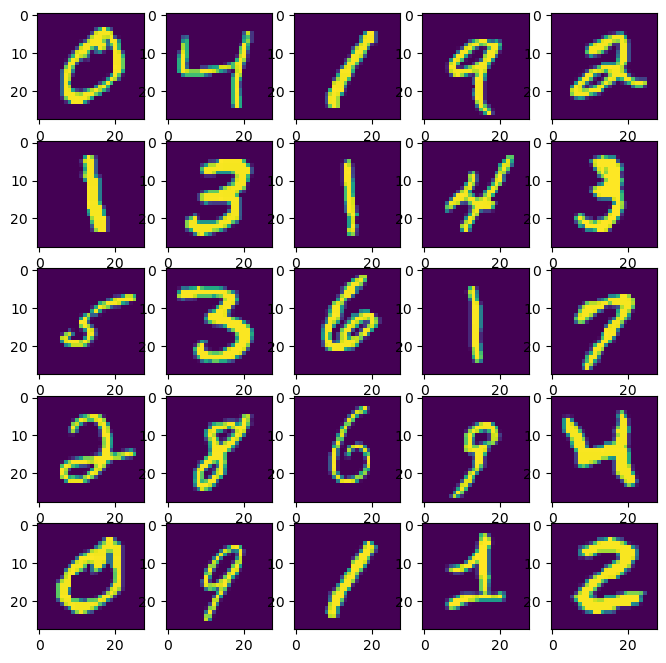

In [4]:
figure=plt.figure(figsize=(8,8))
for i in range(1,26):
  figure.add_subplot(5,5,i)
  plt.imshow(x_train[i])

In [5]:
# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input images to match the expected format
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [52]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(256,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)]
                          )

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 28s 58ms/step - loss: 0.4242 - accuracy: 0.8638 - val_loss: 0.1539 - val_accuracy: 0.9514
Epoch 2/10
469/469 [==============================] - 27s 57ms/step - loss: 0.1319 - accuracy: 0.9594 - val_loss: 0.0978 - val_accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.0977 - val_accuracy: 0.9682
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0846 - accuracy: 0.9741 - val_loss: 0.0711 - val_accuracy: 0.9779
Epoch 5/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 6/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0634 - accuracy: 0.9804 - val_loss: 0.0701 - val_accuracy: 0.9783
Epoch 7/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0719 - val_accuracy:

313/313 [==============================] - 2s 6ms/step
The predicted number is  5


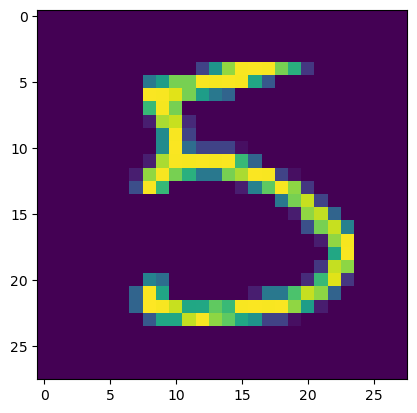

In [64]:
prediction=model.predict(x_test)
prediction=np.argmax(prediction,axis=1)
plt.imshow(x_test[15].reshape(28,28))
print('The predicted number is  '+str(prediction[15]))

In [78]:

# Create the GUI application
window = tk.Tk()
canvas = tk.Canvas(window, width=280, height=280, bg='white')
canvas.pack()

def draw(event):
    x = event.x
    y = event.y
    r = 8
    canvas.create_oval(x-r, y-r, x+r, y+r, fill='black')

def predict_number():
    canvas.postscript(file='temp.eps')
    img = Image.open('temp.eps')
    img = img.resize((28, 28), resample=Image.ANTIALIAS)  # Use Resampling.LANCZOS instead
    img_array = np.array(img)
    img_array = img_array[:, :, 0]
    img_array = img_array.reshape(1, 28, 28, 1) / 255.0
    result = model.predict(img_array)
    predicted_class = np.argmax(result[0])
    messagebox.showinfo('Prediction', f'The predicted number is: {predicted_class}')

canvas.bind('<B1-Motion>', draw)
predict_button = tk.Button(window, text='Predict', command=predict_number)
predict_button.pack()

window.mainloop()


C:\Users\abdel\AppData\Local\Temp\ipykernel_17748\938666293.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((28, 28), resample=Image.ANTIALIAS)  # Use Resampling.LANCZOS instead


1/1 [==============================] - 0s 28ms/step
